<a href="https://colab.research.google.com/github/K4cp3rski/ML_FUW/blob/master/Cybi%C5%84ski_Praca_domowa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rozpoznawanie obrazu na potrzeby eksperymentu naukowego

Pi of the Sky (https://www.pi.fuw.edu.pl/jest) jest eksperymentem astrofizycznym, którego głównym celem jest poszukiwanie rozbłysków gamma (GRB) (https://pl.wikipedia.org/wiki/Rozbłysk_gamma). W tym celu zautomatyzowane teleskopy w Chile i Hiszpanii fotografują niebo w poszukiwaniu interesujących zdarzeń. Klasyczne algorytmy wykrywania rozbłysków gamma działają w następujący sposób: wybrany obszar nieba jest stale fotografowany w pewnych odstępach czasu, jeżeli skanowany obszar zmieni się w jakiś sposób, może to oznaczać, iż pojawiło się nowe źródło promieniowania, dlatego kilka(naście) klatek (zdjęć) przed i po wystąpieniu zjawiska jest zachowywanych do późniejszej analizy. Naukowcy analizują sekwencję zdjęć aby stwierdzić, czy faktycznie zaobserwowano rozbłysk gamma. Niestety, wiele spośród zebranych danych to fałszywe alarmy, wywołane np. przez chmury poruszające się na niebie. Celem niniejszego ćwiczenia jest stworzenie algorytmu uczenia maszynowego opartego o konwolucyjne sieci neuronowe, który mógłby usprawnić analizę poprzez odsiewanie niepoprawnych danych, oszczędzając pracy naukowcom.

W zadaniu chcemy stworzyć tzw. "proof of concept", czyli rozwiązanie dalekie od ostatecznego, ale pokazujące, że problem może potencjalnie zostać rozwiązany z użyciem zaproponowanej metody. Ograniczymy się do analizy pojedynczych obrazów a nie całych sekwencji. Chcemy dokonać klasyfikacji obrazów należących do trzech klas:

0) zdjęcia potencjalnie zawierające rozbłyski gamma 

1) fałszywe alarmy przedstawiające niebo z chmurami

2) fałszywe alarmy zawierające artefakty spowodowane wadliwą pracą aparatury badawczej (poziome/pionowe linie)

 ## Polecenia


#### Uwaga ogólna: Wszystkie wykresy i obrazki w notatniku mają być estetyczne, zawierać podpisy osi, tytuły, legendy itp. Wypisując jakieś wartości należy napisać również czym one są. Przed wysłaniem rozwiązania należy usunąć wszystkie niepotrzebne komentarze i komórki. Mile widziane są opisy/komentarze wyjaśniające co w danej komórce próbujecie zrobić.

1. Wczytanie i wstępna obróbka danych
     * Proszę pobrać archiwum "data.zip":
     https://github.com/Rav2/uczenie-maszynowe-2021-22/raw/main/praca_domowa/data.zip
     * Archiwum należy rozpakować. Folder "data" zawiera trzy podfoldery odpowiadające trzem klasom: "0", "1" oraz "2", które zawierają obrazki w formacie JPG. Wszystkie obrazki mają identyczne wymiary. Jeśli chcecie pracować w Google Collab, to polecam przesłać obrazki na dysk Google i podłączyć ten dysk do notebooka (instrukcja niżej).
     * Proszę wczytać obrazki, np. korzystając z funkcji
     tensorflow.keras.preprocessing.image.load_img (patrz przykład poniżej) i stworzyć tensor cech X i wektor etykiet y.
     * Tensor cech powinnien mieć wymiar (3573, 100, 100, 1). 1 odpowiada pojedynczemu kanałowi (czarno-biały obraz). Jeżeli dane nie mają takiego kształtu to proszę im go nadać.
     * Proszę sprawdzić i wyświetlić liczebność klas.
     * Proszę sprawdzić i wyświetlić wymiary obrazka (w pikselach) i zapisać do zmiennych. Przydadzą się później.
     * Proszę wyświetlić po jednym obrazku z każdej klasy wraz z numerem klasy.
2. Preprocessing
     * Proszę przeskalować wartości pikseli tak, żeby były w przedziale [0,1].
     * Proszę podzielić dane na zbiory uczący (70%) i testowy (30%).
     * Proszę sprawdzić, czy rozkład klas w obu zbiorach jest zbliżony. Jeżeli nie jest, to proszę dokonać podziału danych tak, żeby był.
3. Uczenie sieci
    * Proszę zaproponować architekturę sieci opartą o warstwy CNN. Proszę wykorzystać również pooling oraz dropout i pamiętać o spłaszczeniu na końcu. Sieć ma przyjmować obrazki w oryginalnych rozmiarach. Proszę pamiętać o właściwej funkcji aktywacji w ostatniej warstwie.
    * Proszę wytrenować sieć wydzielając ze zbioru uczącego 15% na walidację.
    * Proszę narysować wykresy accuracy i funkcji kosztu w funkcji numeru epoki (iteracji) uczenia, zarówno dla zbioru uczącego jak i walidacyjnego.
4. Ewaluacja
    * Proszę dokonać predykcji na zbiorze testowym.
    * Proszę wypisać raport z klasyfikacji i macierz pomyłek. W przypadku otrzymania mniej niż 80% accuracy proszę porawić architekturę i parametry sieci.
    * Proszę policzyć procent poprawnie sklasyfikowanych obrazków dla każdej z klas i przedstawić na histogramie.
    * Proszę narysować wykres ROC i podać pole wykresu pod krzywą. 
5. Generacja pseudodanych
  * Proszę zapoznać się z dokumentacją klasy tensorflow.keras.preprocessing.image.ImageDataGenerator oraz przykładami użycia.
  * Proszę stworzyć obiekt typu ImageDataGenerator z parametrami pozwalającymi na generację pseudodanych poprzez użycie:
    a) przesunięcia o nie wiecej niż 20 pikseli
    b) odbicia względem osi OX lub OY
    c) zoom do 10%
  * Proszę przeznaczyć 15% zbioru treningowego na zbiór walidacyjny.
  * Korzystając z metody "flow" dla obiektu typu ImageDataGenerator proszę wytrenować sieć neuronową.
  * Proszę przeprowadzić ponowną ewaluację sieci wytrenowanej z generacją pseudodanych.
  *Proszę porównać wyniki z wcześniejszymi i napisać kilka zdań komentarza z wyjaśnieniem obecności lub braku różnic.

6. Dodatkowe (dla chętnych)
    * Znaleźć optymalne wartości hiperparametrów sieci w sposób automatyczny, wykorzystując jedną z dostępnych bibliotek lub implementując samemu, np. z użyciem zagnieżdżonych pętli for.
    * Dla znalezionych parametrów wykonać uczenie i ewaluację. Porównać z wcześniejszymi wynikami.

#### Pobranie danych i rozpakowanie

In [1]:
# Odkomentuj i wykonaj, żeby pobrać dane i rozpakować
# ! wget https://github.com/Rav2/uczenie-maszynowe-2021-22/raw/main/praca_domowa/data.zip
# ! unzip -q data.zip

 #### Podpięcie dysku Google do notebooka (po tym wszystkie pliki na dysku będą dostępne, trzeba zatwierdzić w wyskakujących okienkach)

In [2]:
# # Jeżeli chcesz/potrzebujesz udostępnić swój dysk Google notatnikowi z Collaba to możesz to zrobić następująco.
# # Odkomentuj i wykonaj, żeby podłączyć swój dysk Google do notatnika
# # Pliki będą dostępne pod ścieżką /content/drive/...

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.Session(config=config)

#### przykład wczytania obrazka nr 5 z folderu 'data/1/' i konwersji do numpy array

In [4]:
# import os
# import numpy as np
# from tensorflow.keras.preprocessing.image import load_img

# # Sprawdź jakie pliki są w folderze
# files = os.listdir('data/1/')
 
# # Ustal pełną ścieżkę do pliku nr 5
# path = os.path.join('data/1/', files[5])
 
# # Wczytaj obrazek
# img = load_img(path, color_mode='grayscale')
 
# # Przekonwertuj do tablicy w numpy
# img_arr = np.asarray(img)

# Rozwiązanie

Najpierw szykujemy komórkę z techincznymi importami, bez których nie mamy podjazdu do rozwiązania zadania

In [5]:
import sys, os

from termcolor import colored
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

seed = 128
rng = np.random.RandomState(seed)

In [23]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import np_utils

### Teraz sobie zaimportujemy nasz folder w tensor

In [7]:
import pathlib

dataset_url = "https://github.com/Rav2/uczenie-maszynowe-2021-22/raw/main/praca_domowa/data.zip"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname="data.zip",
                                   extract=True)
data_dir = pathlib.Path(data_dir)
os.system(f"rm {data_dir}")
data_dir = data_dir.parent.joinpath("data")

14065664/14050616 [==============================] - 1s 0us/step


In [8]:
#  Deklarujemy niezbędne parametry
batch_size = 3573
img_height = 100
img_width = 100

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3573


In [10]:
[x for x in data_dir.iterdir() if x.is_dir()]

[PosixPath('/Users/k4cp3rskiii/.keras/datasets/data/0'),
 PosixPath('/Users/k4cp3rskiii/.keras/datasets/data/1'),
 PosixPath('/Users/k4cp3rskiii/.keras/datasets/data/2')]

In [11]:
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    color_mode = 'grayscale',
    image_size=(img_height, img_width),
    label_mode = 'categorical',
    batch_size=batch_size)

Found 3573 files belonging to 3 classes.
Metal device set to: Apple M1


2022-02-06 02:12:30.791174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-06 02:12:30.791342: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
ds.cardinality().numpy()

1

In [13]:
for images, labels in ds.take(1):  # only take first element of dataset
    extracted_images = images
    extracted_labels = labels

2022-02-06 02:12:30.868370: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [14]:
extracted_images.shape

TensorShape([3573, 100, 100, 1])

In [15]:
ds.class_names

['0', '1', '2']

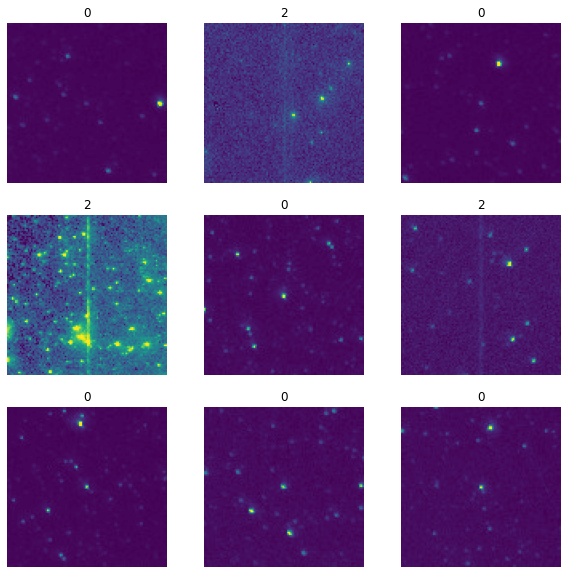

In [18]:
plt.figure(figsize=(9, 3))

for i in range(3):
    ax = plt.subplot(3, 1, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(ds.class_names[int(np.argmax(labels[i]))])
    plt.axis("off")

In [19]:
# Funkcja wzięta z https://stackoverflow.com/a/63493396
# Train_test_split zaadaptowane do tensorów z TensorFlow

def train_test_split_tensors(X, y, **options):
    """
    encapsulation for the sklearn.model_selection.train_test_split function
    in order to split tensors objects and return tensors as output

    :param X: tensorflow.Tensor object
    :param y: tensorflow.Tensor object
    :dict **options: typical sklearn options are available, such as test_size and train_size
    """

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), **options)

    X_train, X_test = tf.constant(X_train), tf.constant(X_test)
    y_train, y_test = tf.constant(y_train), tf.constant(y_test)

    del(train_test_split)

    return X_train, X_test, y_train, y_test

#### Tutaj dzielimy zbiór na dane testowe i treningowe

Jest to robione metodą stratified, by zachować propocje klas (bo nie ma zabójczej dysproporcji klas)

In [28]:
train_set, test_set, train_labels, test_labels = train_test_split_tensors(images, labels, test_size=0.3, shuffle=True, stratify=labels)

Tutaj chyba **WRESZCIE** mamy jakiś model ML (po 6 h certolenia się z technikaliami TensorFlow)

In [29]:
def plotTrainingHistory(model):

    history = model.history
    epochs_num = len(history['accuracy'])
    epoch_range = np.linspace(1, epochs_num, num=epochs_num)
    fig, axes= plt.subplots(1,2,figsize=(10,5))
    axes[0].plot(epoch_range, history['loss'], color='cyan')
    axes[0].plot(epoch_range, history['val_loss'], color='orange')
    axes[0].set_ylabel('Loss function value')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['train', 'validation'], loc='upper right')

    axes[1].plot(epoch_range, history['accuracy'], color='cyan')
    axes[1].plot(epoch_range, history['val_accuracy'], color='orange')
    axes[1].set_ylabel('Accuracy score')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['train', 'validation'], loc='lower right')

    fig.show()

In [82]:
def printScores(model, X, Y):
    y_pred = model.predict(X)
    y_true = Y

    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_true, axis=1)


    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

Definicja struktury modelu

In [30]:
def getModelWithRegularisation(nFilters, kernel_size, pool_size, nNeurons, nHiddenLayers, dropout_rate, l2_lambda, inputShape, outputWidth):
    inputs = tf.keras.Input(shape=inputShape)
    x = inputs
    x = (tf.keras.layers.Rescaling(1./255))(x)
    for iHidden in range(nHiddenLayers):   
        x = tf.keras.layers.Conv2D(filters=nFilters, kernel_size=kernel_size, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=pool_size)(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(nNeurons, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(x)
    outputs = tf.keras.layers.Dense(outputWidth, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Parametry trenowanego modelu

In [34]:
verb=1
dropout_rate = 0.2
l2_lambda = 0.001
epochs = 10
batch_size = 128
nFilters = 32
kernel_size = 3
pool_size = (2,2)
nNeurons = 128 
nHiddenLayers = 1 
inputShape = (100, 100, 1)
outputWidth = 3

In [40]:
model_primo = getModelWithRegularisation(nFilters, kernel_size, pool_size, nNeurons, nHiddenLayers, dropout_rate, l2_lambda, inputShape, outputWidth)

model_primo_fit = model_primo.fit(train_set, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_set, test_labels), verbose=verb, use_multiprocessing=True, validation_split=0.15)



Epoch 1/10


2022-02-06 03:00:09.486435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - ETA: 0s - loss: 1.1125 - accuracy: 0.6588

2022-02-06 03:00:12.877810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 4s 200ms/step - loss: 1.1125 - accuracy: 0.6588 - val_loss: 0.6599 - val_accuracy: 0.8005
Epoch 2/10
17/17 [==============================] - 3s 171ms/step - loss: 0.5666 - accuracy: 0.8607 - val_loss: 0.5104 - val_accuracy: 0.8670
Epoch 3/10
17/17 [==============================] - 3s 168ms/step - loss: 0.4416 - accuracy: 0.8960 - val_loss: 0.4142 - val_accuracy: 0.8697
Epoch 4/10
17/17 [==============================] - 3s 170ms/step - loss: 0.3472 - accuracy: 0.9416 - val_loss: 0.3360 - val_accuracy: 0.9043
Epoch 5/10
17/17 [==============================] - 3s 170ms/step - loss: 0.2881 - accuracy: 0.9619 - val_loss: 0.2664 - val_accuracy: 0.9761
Epoch 6/10
17/17 [==============================] - 3s 169ms/step - loss: 0.2682 - accuracy: 0.9624 - val_loss: 0.2384 - val_accuracy: 0.9787
Epoch 7/10
17/17 [==============================] - 3s 175ms/step - loss: 0.2237 - accuracy: 0.9713 - val_loss: 0.2310 - val_accuracy: 0.9495
Epoch 8/10
17/17 

/var/folders/4f/nc8733x97cnbfw1jfx_t9mfm0000gn/T/ipykernel_21646/1127479491.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


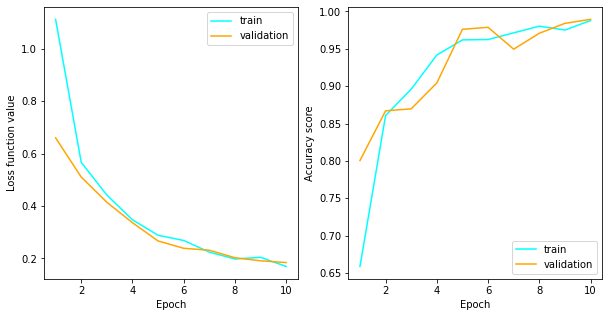

In [41]:
plotTrainingHistory(model_primo_fit)   

In [79]:
printScores(model_primo, test_set,  test_labels)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       593
           1       0.93      1.00      0.96       212
           2       0.98      0.90      0.94       267

    accuracy                           0.97      1072
   macro avg       0.96      0.96      0.96      1072
weighted avg       0.97      0.97      0.97      1072

[[589   0   4]
 [  0 212   0]
 [ 10  17 240]]


In [106]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle

def roc_auc(model, X, Y):
    y_score = model.predict(X)
    y_test = Y.numpy()
    n_classes = Y[0].shape[0]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(15, 9))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )
    lw = 2
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
        )
        
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Some extension of Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.show()

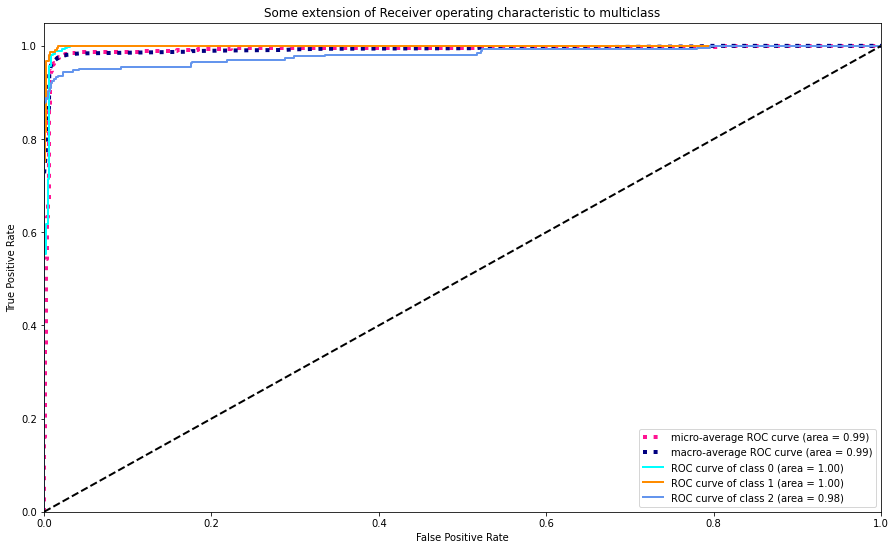

In [107]:
roc_auc(model_primo, test_set,  test_labels)